<span style="color: orange">DRAFT: WILL BE FINALIZED BY FRIDAY. PROBABLY ONLY SMALL CHANGES IF ANY.</span>

## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 7: Graphs and Networks
## Due 20 November, 2019 at 6:00 PM
### <span style="color: red">YOUR NAME HERE</span>

Copyright &copy; 2019, University of Washington

<hr>

**Instructions**: Use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="background: yellow; padding: 6px; border: 1pt solid black">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate. 
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order. 

Note : Late homework will be accepted up to one week after the due date and will be worth 50% of its full credit score. 

### 0. Warmup (Do not turn in)

- Make sure you get download, read, and run the notebook for lecture 7. Work through the notebook cell by cell and see what happens when you change the expressions, and make up some of your own.
- The material covered in class is intended to be an introductory overview of the incredibly rich and expansive subject of Graph Theory.
- Most of the section on basic graph theory is from chapter one of

> Bollobas, [Modern Graph Theory](https://www.springer.com/gp/book/9780387984889).

- The spanning tree algorithm by Prim is from 

> Gibbons, [Algorithmic Graph Theory](https://www.amazon.com/Algorithmic-Graph-Theory-Alan-Gibbons/dp/0521288819). 

- Graphs as matrices is covered in 

> Nica, [A Brief Introduction to Spectral Graph Theory](https://www.amazon.com/Introduction-Spectral-Theory-Textbooks-Mathematics/dp/3037191880/ref=sr_1_2?crid=3ETRQ8B0PW4EJ&keywords=spectral+graph+theory&qid=1573687537&s=books&sprefix=spectral+graph%2Cstripbooks%2C195&sr=1-2).

The consensus algorithm is described in [these notes](http://www.eeci-institute.eu/pdf/M010/Eeci-sp09_L4_graphtheory.pdf) by Richard Murray.

You will also need `networkx` which can be obtained [here](https://networkx.github.io/). If you are on Google CoLab, see [here](https://stackoverflow.com/questions/51342408/how-do-i-install-python-packages-in-googles-colab) for how to install packages. 

In [10]:
# Imports
import io
import requests
import random
import itertools
import math
import cmath
import pandas as pd
import numpy as np
import networkx as nx
import sympy as sp
sp.init_printing(use_latex='mathjax')
import scipy
import scipy.ndimage
import scipy.integrate as spi
import matplotlib.pyplot as plt
import matplotlib.patches as pch
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#import warnings
#warnings.filterwarnings("ignore", module="matplotlib")

### 0. Creating a Graph

Let $V = \{ 1, ..., 20 \}$ and say that $uv \in E$ if and only if $u$ and $v$ have a common factor other than $1$. Use `networkx` to define this graph and render it. Make sure to label the nodes.

In [ ]:
'''uv in E iff  u  and  v  have a common factor other than  1 (i.e. u,v not coprime)'''
# Undirected Graph
G = nx.Graph()
G.add_nodes_from(range(1,21)) # V: 20 nodes

# Finds the greatest common factor of 2 input numbers a,b
print(math.gcd(1,15))

# Here is a possible implementation
mylist = [] # fill this up with edges u,v iff u,v not coprime
for u in range(1,21): # possible u node in V
    for v in range(1,21): # possible v node in V
        if #uv are not coprime then
            # add them to mylist
            
G.add_edges_from(mylist) # V: fill out 20 nodes

basic_graph,ax = plt.subplots(1,1)
nx.draw(G, ax=ax, pos=nx.kamada_kawai_layout(G),with_labels=True, node_color='#444444',font_color="white")



### 2. Isomorphism

Draw all graphs with four nodes and four edges, up to isomorphism.

In [2]:
from scipy.special import comb
comb(4,2)

6.0

/home/kegedy/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


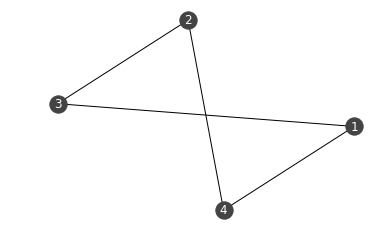

In [5]:
G1 = nx.Graph()
G1.add_nodes_from(range(1,5)) # V: 4 nodes
G1.add_edges_from([(3,2),(1,3),(1,4),(4,2)]) # 4 Edges
basic_graph,ax = plt.subplots(1,1)
nx.draw(G1, ax=ax, pos=nx.kamada_kawai_layout(G1),with_labels=True, node_color='#444444',font_color="white")

### 3. Bipartite Graphs

a) What is the greatest number of edges a connected bipartite graph with $5$ nodes can have? Draw all five node graphs with this number of edges up to isomorphism.

b) What is the least number of edges a connected bipartite graph with $5$ nodes can have? Draw all five node graphs with this number of edges up to isomorphism.

In [7]:
#Create some graphs that may or may not be bipartite
G2 = nx.Graph(); 
G2.add_nodes_from(list(range(1,3)), bipartite=0); # The bipartite set U
G2.add_nodes_from(['a','b','c'], bipartite=1); # The bipartite set V
G2.add_edges_from([(1,'a'),(1,'b'),(1,'c'),(2,'b')]) 

G3 = nx.Graph(); G3.add_nodes_from(list(range(1,3)),bipartite=0); G3.add_nodes_from(['a','b','c'],bipartite=1); 
G3.add_edges_from([(2,'a'),(2,'b'),(2,'c'),(1,'b')]) 

G4 = nx.Graph(); G4.add_nodes_from(list(range(1,3)),bipartite=0); G4.add_nodes_from(['a','b','c'],bipartite=1); 
G4.add_edges_from([(2,'a'),(2,'b'),(2,'c'),(1,'b'),(1,2)])

G5 = nx.Graph(); 
G5.add_nodes_from(list(range(1,6)))
G5.add_edges_from([(1,2)])

Gs = [G2,G3,G4,G5]

# Double check if bipartite
for i,v in enumerate(Gs):
    print('Is Gs['+str(i)+'] bipartite: ' ,nx.is_bipartite(v))

Is Gs[0] bipartite:  True
Is Gs[1] bipartite:  True
Is Gs[2] bipartite:  False
Is Gs[3] bipartite:  True


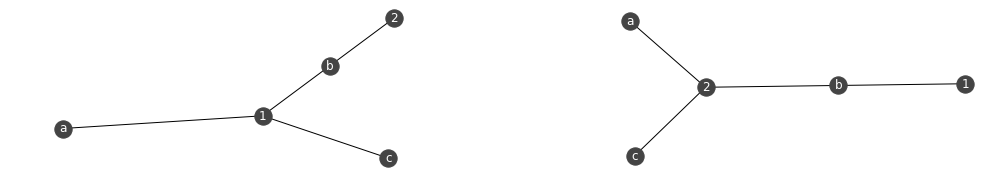

In [8]:
# Plot the graphs
basic_graph,ax = plt.subplots(1,2,figsize=(17,3))
plt.subplots_adjust(wspace=0.5)

nx.draw(G2, ax=ax[0], with_labels=True, pos=nx.kamada_kawai_layout(G2), node_color='#444444',font_color="white")
nx.draw(G3, ax=ax[1], with_labels=True, pos=nx.kamada_kawai_layout(G3), node_color='#444444',font_color="white")

In [11]:
# Check for isomorphisms in the list of Gs
def test4Iso(Gs):
    '''
    Assumes Gs is a list of graphs with the same # of nodes
    Prints out tuples of the indices of Gi,Gj and whether or not Gi is isomorphic to Gj
    '''
    nums = itertools.combinations(range(len(Gs)),2)
    comb = itertools.combinations(Gs,2)

    for i,v in zip(nums,comb): 
        print(i,nx.is_isomorphic(v[0],v[1]))

test4Iso(Gs)

(0, 1) True
(0, 2) False
(0, 3) False
(1, 2) False
(1, 3) False
(2, 3) False


### 4. Cycles

Define and draw a graph that decomposes into three non-overlapping cycles and whose maximal degree is $4$. 

In [12]:
# Cycles have nodes 0...n-1 and edges (i,i+1 mod n) for 0<=i<=n-1. 

# Play around with different configurations

### 5. Hamiltonian Circuits

Consider the set of square grid graphs like those returned by the function `nx.grid_graph(dim=[n,n])` where $n>0$. Show that these graphs always have a Hamilton Circuit when $n$ is even. Use networkx to draw the square grid graph for $n=6$, highlighting a Hamilton cycle. 

In [13]:
def route_graph(route):
    """Turns a list into a graph"""
    R = nx.Graph()
    R.add_nodes_from(route)
    for i in range(len(route)-1):
        R.add_edge(route[i], route[i+1])
    return R

# 1.) Add a route = [(0,0),(0,1)...(0,5),(1,5)...] This IS the Hamilton Circuit
# 2.) Convert route to graph using the function
# 3.) Go to the part of the lecture notes where an orange route is made
# 4.) Draw the graph



### 6. Spanning Trees and Hamilton Paths

In the spanning tree algorithm presented in class (and in the Jupyter notebook for this week), the spanning tree algorithm always starts with node zero. Furthermore, it always chooses the first neighbor of $v$ (in the `v.pop()` line). Thus, when the approximate Hamilton Cycle algorithm finds a spanning tree, it always gets the same one. 

Modify the spanning tree function to choose a random starting point and a random neighbor. Then write a wrapper around the code for the approximate Hamilton Cycle algorithm that runs it 10 times and returns the shortest cycle found.

In [14]:
mylist = [1,2,3,4,5]
for i in range(len(mylist)):
    print(np.random.choice(mylist)) # print a randomly chosen element



1
3
2
4
1


In [ ]:
def spanning_tree(G): # Function from class
    
    """Returns a spanning tree of the graph G if one exists, otherwise
       raises an exception."""
    
    # Initialize
    V = {list(G.nodes)[0]} # INITIALIZE RANDOM STARTING POINT HERE'''
    E = set({})
    
    while len(V) < len(G.nodes):

        # find a node u in V that has a neighbor v in notV
        v = None
        for u in V:
            nbrs = set(G.neighbors(u)) - V
            if len(nbrs) > 0:
                v = nbrs.pop()
                break
        
        # If no v is found, then return an exception
        if v == None:
            raise Exception("Graph is not connected")
        
        # Add that node to V
        V.add(v)
        
        # Add the edge uv to E
        E.add((u,v))
        
    # Build the graph
    T = nx.Graph()
    T.add_nodes_from(V)
    T.add_edges_from(E)
    
    return T

In [ ]:
# Suroutines for for finding approximate HAMILTON CYCLE

# Global variable for storing the nodes visited during depth first search
route = []

def DFS(T):
    """Given a tree T, do a depth first search starting
       with the first node. Returns a list of nodes visited,
       including repeats of nodes revisited when backtracking."""
    global route
    route = []
    for v in T.nodes:
        T.nodes[v]["visited"] = False;
    v = list(T.nodes)[0]
    DFS_aux(T,v)
    return route

def DFS_aux(T,v):
    """Auxilliary method for depth first search"""
    global route
    route.append(v)
    T.nodes[v]["visited"] = True
    children = [u for u in T.neighbors(v) if not T.nodes[u]["visited"]]
    for child in children:
        DFS_aux(T,child)
        route.append(v)

def shorten(G,route):
    """Given a graph G and a route, shorten the route as much
       as possible."""
    new_route = shorten_by_one(G,route)
    while len(new_route) < len(route):
        route = new_route
        new_route = shorten_by_one(G,route)
    return new_route
        
def shorten_by_one(G,route):
    """Given a graph G and a sequence of nodes in route, try to find a 
       repeated node that can be skipped. Return the new route if such a 
       node can be found, or the given route if not."""
    repeats = [v for v in route[1:-1] if route.count(v) > 1]
    random.shuffle(repeats) # avoids always picking 0
    for r in repeats:
        for i,v in enumerate(route):
            if route[i] == r and i != 0 and i != len(route) - 1:
                x,y = route[i-1], route[i+1]
                if G.has_edge(x,y):
                    return route[0:i] + route[i+1:]
    return route

def route_graph(route):
    """Turns a list into a graph"""
    R = nx.Graph()
    R.add_nodes_from(route)
    for i in range(len(route)-1):
        R.add_edge(route[i], route[i+1])
    return R


In [18]:
def myWrapper(G):
    '''
    Assumes G is a graph.
    Returns the shortest approximate Hamilton Cycle found
    '''
    shortest = 80 # A guess that purposely way too big
    myR = G
    for i in range(10):
        # 1.) Put Eric's code here 
        # 2.) update the shortest when found
        # 3.) update myR
    
    return myR

### 7. The Laplacian

Consider the random graphs returned by `nx.fast_gnp_random_graph(n,p)` where $n$ is the number of nodes and $p$ is the probability of an edge between any two nodes. 

Make a list of graphs with $10$ nodes with $p$ ranging from 0 to 1 by steps of 0.01. For each graph, compute the eigenvalues of the Laplacian. Then plot all the eigenvalues for against $p$. For example, above $p=0.01$ you would have a point for each of the 10 real eigenvalues of the graph you made with $p=0.01$. 

What trends do you see in the eigenvalues?

Based on experimentation, what are the eigenvalues of the Laplacian of a completely connected graph?

In [ ]:
# The networkx library can be used to get the Laplacian of a graph
n,p = 10, 0.25 #np.linspace(...)
G = nx.fast_gnp_random_graph(n,p)
print("%d component(s)" % nx.number_connected_components(G)) # if > 1 then not a complete graph
L = nx.laplacian_matrix(G).todense() # We have to make this change todense() because its a sparse matrix opbject

# Changes:
# 1.) create p ranging from 0,1 in 0.01 steps
# 2.) Put code into a for loop that runs for each different p value
# 3.) Calculate the Laplacian at the ith p value
# 4.) Calculate the eigenvalues of the Laplacian at the ith p value
# 5.) Plot all 10 eigenvalues for the ith p value on the same graph as the others 

In [ ]:
# This is from the lecture. We'll need to make some modifications

# Checking that all the eigenvalues are non-neagitve
eigs = np.linalg.eigvals(L)
plt.plot(np.sort(eigs),'o')
plt.title("Eigenvalues of Laplacian of Random Matrix P=0.25")
plt.xlabel('index')
plt.ylabel('Eigenvalues')
plt.show()

In [ ]:
newp = np.linspace(0,1,101)
newp